In [10]:
import sys
import xarray as xr
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#import matplotlib.colors as mcolors

%load_ext autoreload
%autoreload 2
import utils
import databuilder.filemethods as filemethods
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
import databuilder.filemethods as filemethods

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0


In [11]:
config = utils.get_config("exp000")
seed = config["seed_list"][0]

In [12]:
imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    fetch=True,
    verbose=False
)

<xarray.DataArray 'SAMPLES' (time: 4015, lat: 180, lon: 360)> Size: 1GB
array([[[250.5295 , 250.49416, 250.45874, ..., 250.63474, 250.59982,
         250.56473],
        [250.80008, 250.74918, 250.69781, ..., 250.95042, 250.90068,
         250.85059],
        [251.78731, 251.73949, 251.69073, ..., 251.92491, 251.88005,
         251.83417],
        ...,
        [245.29701, 245.03307, 244.76955, ..., 246.0912 , 245.82611,
         245.56136],
        [244.96013, 244.80896, 244.65758, ..., 245.41164, 245.26154,
         245.11101],
        [244.43782, 244.37811, 244.31844, ..., 244.61653, 244.55708,
         244.4975 ]],

       [[249.44743, 249.41974, 249.39194, ..., 249.52962, 249.5024 ,
         249.47499],
        [250.62938, 250.59248, 250.55469, ..., 250.735  , 250.7006 ,
         250.6654 ],
        [252.54747, 252.51933, 252.4897 , ..., 252.62236, 252.59904,
         252.57407],
...
        [251.53311, 251.63751, 251.74028, ..., 251.21152, 251.31996,
         251.4272 ],
        [

In [13]:
print(config)

{'expname': 'exp000', 'device': 'gpu', 'seed_list': [7], 'data_dir': '/Users/C830793391/BIG_DATA/E3SM_Data/', 'figure_dir': '/Users/C830793391/Documents/Research/E3SM/saved/figures', 'model_dir': '/Users/C830793391/Documents/Research/E3SM/saved/models', 'output_dir': '/Users/C830793391/Documents/Research/E3SM/saved/outputs', 'fig_dpi': 300, 'databuilder': {'input_vars': ['PRECT', 'TS'], 'input_region': [[-15.0, 15.0, 40.0, 300.0], [-15.0, 15.0, 40.0, 300.0]], 'input_mask': ['None', 'ocean'], 'ensembles': ['ens1', 'ens2', 'ens3'], 'ensemble_codes': ['0101', '0151', '0201'], 'target_var': 'PRECT', 'target_region': [47.6, 122.0], 'target_months': [4, 5, 6, 7, 8, 9], 'averaging_length': 7, 'fig_dpi': 300, 'data_dir': '/Users/C830793391/BIG_DATA/E3SM_Data/'}}


In [14]:
d_train, d_val, d_test = data.fetch_data()

<xarray.DataArray 'SAMPLES' (time: 4015, lat: 180, lon: 360)> Size: 1GB
array([[[250.5295 , 250.49416, 250.45874, ..., 250.63474, 250.59982,
         250.56473],
        [250.80008, 250.74918, 250.69781, ..., 250.95042, 250.90068,
         250.85059],
        [251.78731, 251.73949, 251.69073, ..., 251.92491, 251.88005,
         251.83417],
        ...,
        [245.29701, 245.03307, 244.76955, ..., 246.0912 , 245.82611,
         245.56136],
        [244.96013, 244.80896, 244.65758, ..., 245.41164, 245.26154,
         245.11101],
        [244.43782, 244.37811, 244.31844, ..., 244.61653, 244.55708,
         244.4975 ]],

       [[249.44743, 249.41974, 249.39194, ..., 249.52962, 249.5024 ,
         249.47499],
        [250.62938, 250.59248, 250.55469, ..., 250.735  , 250.7006 ,
         250.6654 ],
        [252.54747, 252.51933, 252.4897 , ..., 252.62236, 252.59904,
         252.57407],
...
        [251.53311, 251.63751, 251.74028, ..., 251.21152, 251.31996,
         251.4272 ],
        [

In [15]:
# d_train['x'].sel(channel = 1)

### MJO Composites: 

In [191]:
import databuilder.indicescompositor as indicescompositor
from databuilder.indicescompositor import compositeindices
imp.reload(indicescompositor)

MJO_train, MJO_val, MJO_test, phases = compositeindices(config, d_train)

(60105, 3)


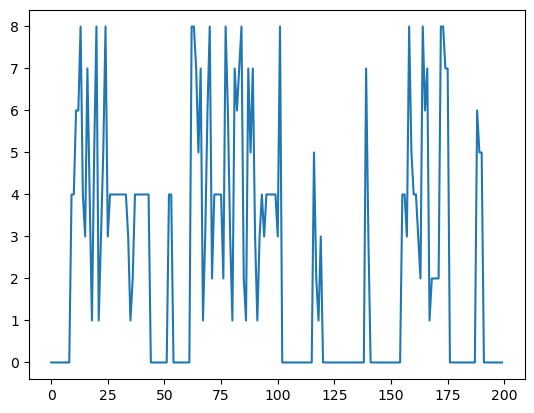

In [192]:
plt.plot(phases[1000:1200,2])

1.0
(60105, 7)


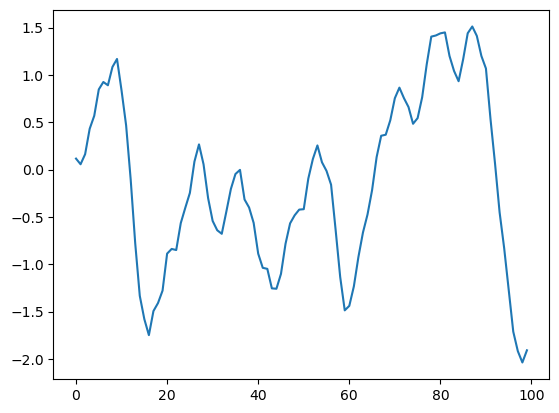

In [124]:
plt.plot(MJO_train[20000:20100,3])
print(MJO_train[:,6].min())
print(MJO_test.shape)

In [181]:
mjototal = np.array([MJO_train, MJO_val, MJO_test])
print(mjototal.shape)

type(mjototal)
mjototal[0,:,0].shape

(3, 60105, 7)


(60105,)

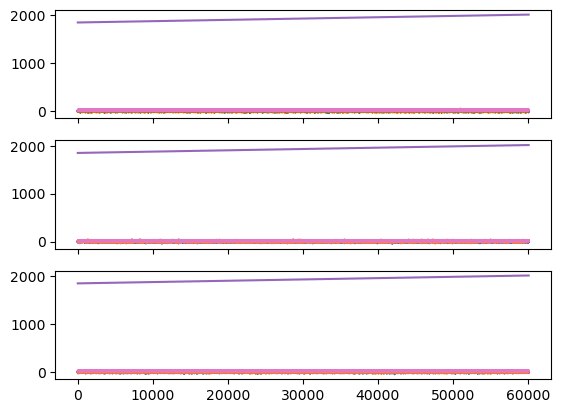

In [74]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
ax[0].plot(MJO_train, label = 'ens1')
ax[1].plot(MJO_val, label = 'ens2')
ax[2].plot(MJO_test, label = 'ens3')

/System/Volumes/Data/Users/C830793391/miniconda3/pkgs/libtiff-4.5.1-h313beb8_0/lib/libtiff.5.dylib


/System/Volumes/Data/Users/C830793391/miniconda3/envs/jvp1/lib/libtiff.5.dylib

Users/C830793391/miniconda3/envs/env-torch/lib/libtiff.6.dylib




In [ ]:
# import gzip, pickle

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_train.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_train, fp)
#     pickle.dump(labels_train, fp)

#     pickle.dump(x_mean, fp)
#     pickle.dump(x_std, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_val_test.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_val, fp)
#     pickle.dump(labels_val, fp)

#     pickle.dump(x_test, fp)
#     pickle.dump(labels_test, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)